# Introduction to Support Vector Machines (SVM)

Figures and some text is taken from https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f

## Motivation

SVMs are similar to logistic regression. They find the hyperplane that has the maximum margin in an N-dimensional space(N — the number of features) that distinctly classifies the data points. In the left figure, logistic regression might find any of the given hyperplanes, depending on how the points are arranged. The right figure shows what an SVM would result in. 

<img src="svm.png" width="500"/>

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier.

<img src="svm2.png" width="500"/>

SVMs are also more tolerant of outliers. The right figure below shows what would happen with logistic regression given an outlier. The figure on the left shows the SVM's hyperplane.

<img src="outliers.png" width="500"/>

Using the *kernel trick* we still use a linear fit but on points in a richer feature space.

### SVM vs Logistic Regression

Logistic Regression:
* Gives probabilities -- very useful in multiclass classification and other contexts
* Simple

SVM:
* Maximize the margin between the closest support vectors
* Less sensitive to outliers than LR

In [85]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import math

## LR vs SVM - decision boundaries

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


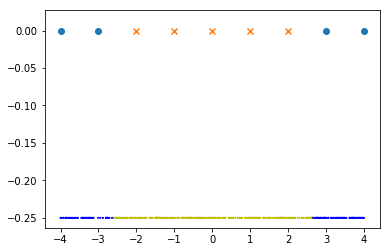

In [90]:
X = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

# We can get a nice decision boundary for this dataset...
y = [1, 1, 1, 1, 1, 0, 0, 0, 0]

# ...but not for this one
y = [0, 0, 1, 1, 1, 1, 1, 0, 0]

Xy = list(zip(X, y))
zeros = [xy for xy in Xy if xy[1] == 0]
(Xzeros, yzeros) = list(zip(*zeros))
ones = [xy for xy in Xy if xy[1] == 1]
(Xones, yones) = list(zip(*ones))

plt.scatter(Xzeros, [0 for _ in Xzeros], marker='o')
plt.scatter(Xones, [0 for _ in Xones], marker='x')

#--------------------------------
# LR
#--------------------------------
lm = LogisticRegression()
lm.fit([[x] for x in X], y)

b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]

# Draw the decision boundary
db = -b0 / b1
plt.plot([db, db], [-1, 1])

#--------------------------------
# SVM
#--------------------------------
clf = svm.SVC(kernel='poly', degree=2)
clf.fit([[x] for x in X], y)

# add random points
import random
newx = []
newlabel = []
for _ in range(500):
# for _ in range(5000):
    px = random.uniform(-4, 4)
    plabel = clf.predict([[px]])
    newx.append(px)
    newlabel.append(plabel)

color = ['b' if y_ == 0 else 'y' for y_ in newlabel]
plt.scatter(newx, [-0.25 for _ in newx], c=color, marker='o', s=1);

## Data scientist social networking dataset
This data is of data scientists at a certain company. Each data scientist has a number of years of experience, a salary, and whether they paid for a premium subscription to a data science social networking website.

In [91]:
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = list(map(list, data)) # change tuples to lists

df = pd.DataFrame({'experience':[row[0] for row in data],
                   'salary':[row[1] for row in data],
                  'premium':[row[2] for row in data]})
display(df.head())

df.experience = (df.experience - df.experience.mean()) / df.experience.std()
df.salary = (df.salary - df.salary.mean()) / df.salary.std()



,experience,salary,premium
0,0.7,48000,1
1,1.9,48000,0
2,2.5,60000,1
3,4.2,63000,0
4,6.0,76000,0


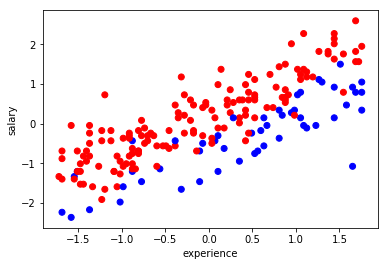

In [92]:
X = df[['experience', 'salary']]
y = df.premium

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color)
plt.xlabel('experience')
plt.ylabel('salary')


## Classification using a linear kernel
We want to predict whether a given data scientist is going to sign up for a premium subscription to the social networking site using a support vector machine. (SVC stands for Support Vector Classification.)

Our f score is basically the same as it was for logistic regression. Why? Because we're using a linear model SVM!

Change the class weight for class "0" from 1 to 7. See what happens to the classification. In particular, see what happens to the precision and recall.

'precision = [0.89240506 0.83333333]'

'recall = [0.9527027  0.67307692]'

'f-score = [0.92156863 0.74468085]'

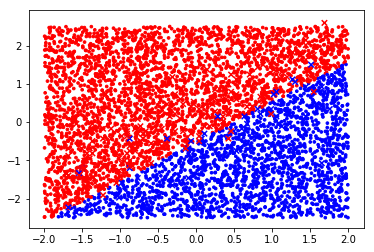

In [93]:
clf = svm.SVC(kernel='linear', class_weight={0:1})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color, s=30, marker='x')



## Classification using a polynomial kernel

'f-score = [0.89570552 0.54054054]'

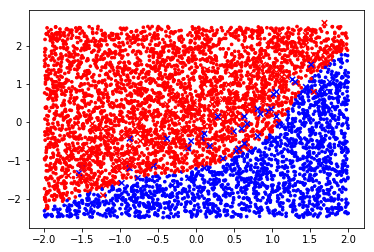

In [96]:
# Try changing the degree
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color, s=30, marker='x')



## Classification using a radial basis function (RBF)

RBFs can handle very complex decision boundaries but require more data to learn.

'f-score = [0.92307692 0.72727273]'

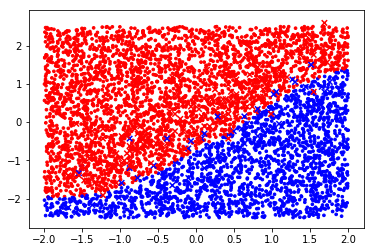

In [97]:
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color, s=30, marker='x')



# A different dataset

,x1,x2,y
0,1.794126,-1.706983,1
1,-1.295625,1.618645,1
2,0.110201,0.881441,1
3,0.970521,1.421673,0
4,1.735008,1.800811,1


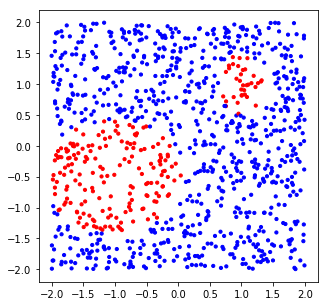

In [104]:


data = []#[(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
for _ in range(1000):
    x1 = random.uniform(-2, 2)
    x2 = random.uniform(-2, 2)
    y = 1 if math.sqrt(2*x1**2 + x2**2) > 1.5 else 0
    y = 0 if (math.sqrt(2*(x1-1)**2 + (x2-1)**2) < 0.5 or math.sqrt(.2*(x1+1)**2 + .3*(x2+0.5)**2) < 0.5) else 1
    data.append((x1, x2, y))
data = list(map(list, data)) # change tuples to lists

df = pd.DataFrame({'x1':[row[0] for row in data],
                   'x2':[row[1] for row in data],
                  'y':[row[2] for row in data]})
display(df.head())

X = df[['x1', 'x2']]
y = df.y

plt.figure(figsize=(5, 5))
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.x1, df.x2, c=color, s=10)


Try linear, polynomial, and radial basis function (RBF) SVMs on the dataset.

For all SVM kernels, "The C parameter trades off correct classification of training examples against maximization of the decision function’s margin" [documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py).

Regarding the RBF SVM, one important parameter is gamma. gamma determines a points' sphere of influence. Consider using [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to determine good values for the C and gamma parameters.

See [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py) for more details.

'f-score = [0.97101449 0.9924338 ]'

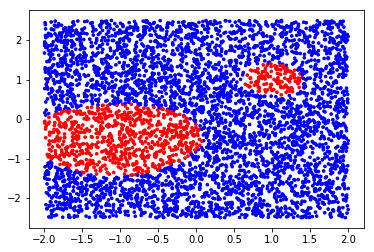

In [117]:
clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='poly', degree=4) # try degree=2,4
clf = svm.SVC(kernel='rbf', gamma=1) # try gamma=.1,1
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

plt.figure()
color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

# color = ['r' if y_ == 0 else 'b' for y_ in y]
# plt.scatter(df.x1, df.x2, c=color, s=30, marker='x')

